In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
%matplotlib inline

In [14]:
VERBOSE = False

cleaned_data_location='../data/gapminder_cleaned.csv'
try:
    df=pd.read_csv(cleaned_data_location)
    if VERBOSE:
        print(df.head())
except FileNotFoundError:
        print('Could not find data file, check path? You tried', cleaned_data_location)


In [20]:
years = df['year'].unique()
years.sort()
assert years[-1]==2007
assert years[0]==1952

In [34]:
#mean lifeexp in 1952 in asia

mask_asia=df['continent']=='asia'
df_asia=df[mask_asia]
mask_1952=df_asia['year']==1952
df_1952=df_asia[mask_1952]
value=np.mean(df_1952['lifeexp'])
value

if VERBOSE:
    print('mean for 1952 is', value)
    
#create an empty list to store life expectancies over time
result=[]

#add the expectancy
result.append(('asia','1952', value))
result = pd.DataFrame(result, columns=['continent', 'year', 'lifeexp'])


In [39]:
mask_asia=df['continent']=='asia'
df_asia=df[mask_asia]

#pull out all the years from the asia dataset
years = df_asia['year'].unique()

#create an empty list to store the summary values
summary=[]

#pull out the mean life expenctancies at each year
for year in years:
    mask_year=df_asia['year']==year
    df_year=df_asia[mask_year]
    value=np.mean(df_year['lifeexp'])
    summary.append(('asia', year, value))

summary = pd.DataFrame(summary, columns=['continent', 'year', 'lifeexp'])

In [75]:
#how to make this work for different continent

continent = 'europe'

mask_continent=df['continent']==continent
df_continent=df[mask_continent]

#pull out all the years from the continent's dataset
years = df_continent['year'].unique()

#create an empty list to store the summary values
summary=[]

#pull out the mean life expenctancies at each year
for year in years:
    mask_year=df_continent['year']==year
    df_year=df_continent[mask_year]
    value=np.mean(df_year['lifeexp'])
    summary.append((continent, year, value))

summary = pd.DataFrame(summary, columns=['continent', 'year', 'lifeexp'])

summary

,continent,year,lifeexp
0,europe,1952,64.408500
1,europe,1957,66.703067
2,europe,1962,68.539233
3,europe,1967,69.737600
4,europe,1972,70.775033
5,europe,1977,71.937767
6,europe,1982,72.806400
7,europe,1987,73.642167
8,europe,1992,74.440100
9,europe,1997,75.505167


360


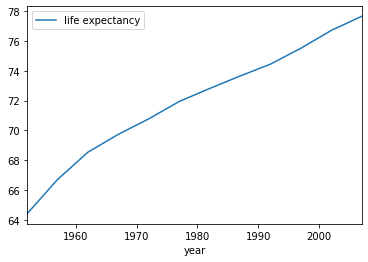

In [72]:
summary.plot.line('year', 'lifeexp', label='life expectancy')
print(len(df_continent))

In [77]:
#how to make this work for different continent

continent = 'asia'

mask_continent=df['continent']==continent
df_continent=df[mask_continent]

#pull out all the years from the continent's dataset
years = df_continent['year'].unique()

#create an empty list to store the summary values
summary=[]

#pull out the mean life expenctancies at each year
for year in years:
    mask_year=df_continent['year']==year
    df_year=df_continent[mask_year]
    value=np.mean(df_year['lifeexp'])
    summary.append((continent, year, value))

summary = pd.DataFrame(summary, columns=['continent', 'year', 'lifeexp'])

summary

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


In [91]:
def calculate_mean_over_time(df, category, continent, verbose = True):
    mask_continent=df['continent'] == continent
    df_continent = df[mask_continent]

    #pull out all the years from the continent's dataset
    years = df_continent['year'].unique()

    #create an empty list to store the summary values
    summary = []

    #pull out the mean category value at each year
    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year[category])
        if verbose:
            print('adding', continent, value)
        summary.append((continent, year, value))

    summary = pd.DataFrame(summary, columns = ['continent', 'year', category])
    return summary
    
    
    

In [96]:
VERBOSE = False
calculate_mean_over_time(df, 'pop', 'europe', VERBOSE)

,continent,year,pop
0,europe,1952,1.393736e+07
1,europe,1957,1.459635e+07
2,europe,1962,1.534517e+07
3,europe,1967,1.603930e+07
4,europe,1972,1.668784e+07
5,europe,1977,1.723882e+07
6,europe,1982,1.770890e+07
7,europe,1987,1.810314e+07
8,europe,1992,1.860476e+07
9,europe,1997,1.896480e+07


In [121]:
def calculate_func_over_time(df, category, continent, func, verbose = False):
    """Calculates values of a statistic function over time
    
    Args:
        df: a pandas DataFrame
        category: one of column headers in your DataFrame df (e.g. 'lifeexp')
        continent: possible value of continent column in your DataFrame (e.g. 'africa')
        func: function to apply on the data value (e.g. np.mean)
        verbose: show debugging output (optional, defaults to False)
    
    Returns:
        a summary table of values per year (DataFrame)
    
    """
    
    #check the values provided
    assert category in df.columns.values
    assert 'continent' in df.columns.values
    assert continent in df['continent'].unique()
    
    mask_continent=df['continent'] == continent
    df_continent = df[mask_continent]

    #pull out all the years from the continent's dataset
    years = df_continent['year'].unique()

    #create an empty list to store the summary values
    summary = []

    #pull out the func category value at each year
    for year in years:
        if verbose:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = func(df_year[category])
        if verbose:
            print('adding', continent, value)
        summary.append((continent, year, value))

    summary = pd.DataFrame(summary, columns = ['continent', 'year', category])
    return summary
    

In [122]:
calculate_func_over_time(df, 'lifeexp', 'asia', len)

,continent,year,lifeexp
0,asia,1952,33
1,asia,1957,33
2,asia,1962,33
3,asia,1967,33
4,asia,1972,33
5,asia,1977,33
6,asia,1982,33
7,asia,1987,33
8,asia,1992,33
9,asia,1997,33


In [111]:
help(calculate_func_over_time)

Help on function calculate_func_over_time in module __main__:

calculate_func_over_time(df, category, continent, func, verbose=False)
    Calculates values of a statistic function over time
    
    Args:
        df: a pandas DataFrame
        category: one of column headers in your DataFrame df (e.g. 'lifeexp')
        continent: possible value of continent column in your DataFrame (e.g. 'africa')
        func: function to apply on the data value (e.g. np.mean)
        verbose: show debugging output (optional, defaults to False)
    
    Returns:
        a summary table of values per year (DataFrame)



In [123]:
type(df)

pandas.core.frame.DataFrame

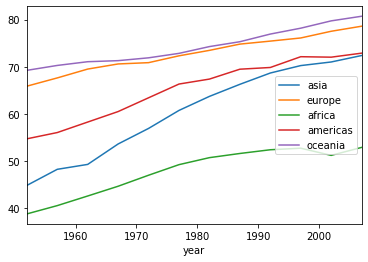

In [124]:
continents = df['continent'].unique()
VERBOSE = False
fig, ax = plt.subplots()

for continent in continents:
    output = calculate_func_over_time(df, 'lifeexp', continent, np.median, VERBOSE)
    output.plot.line('year', 'lifeexp', ax=ax, label = continent)